In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import date
import holidays

In [104]:
pip uninstall seaborn 

Found existing installation: seaborn 0.11.1
Uninstalling seaborn-0.11.1:
  Would remove:
    /Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn-0.11.1.dist-info/*
    /Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /Users/Adit/opt/anaconda3/lib/python3.8/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Christine's Directory
#mydir = "C:/users/cedirp/Downloads/"
#WegmansData = mydir + "WegmansFinalMerged.csv"
#WFD = pd.read_csv(WegmansData)

## Adit's Directory
mydir = "/Users/Adit/Desktop/BANA_785/"
WegmansData = mydir + "WegmansFinalMerged.csv"
WFD = pd.read_csv(WegmansData)


### EDA & FEATURE ENGINEERING

In [4]:
##reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format
                      (end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
# Using  above function to reduce memory usage for Train test df
WFD=reduce_mem_usage(WFD)

Mem. usage decreased to 107.84 Mb (47.6% reduction)


In [6]:
WFD['DATE_KEY'] =  pd.to_datetime(WFD['DATE_KEY'], errors='coerce')

In [7]:
WFD.dtypes

TRANSACTION_KEY             float32
DATE_KEY             datetime64[ns]
CUSTOMER_ID                   int16
ITEM_NBR                      int32
UNITS                          int8
WEIGHT                      float16
SALES                       float16
 PPU                         object
LOCATION_NBR                   int8
INSTACART_IND                  int8
ITEM_DESCRIPTION             object
PRODUCT_HIERARCHY            object
DEPARTMENT_NAME              object
CATEGORY_NAME                object
CLASS_NAME                   object
DEPT.CAT                     object
DEPT.CLASS                   object
CAT.CLASS                    object
IS_ORGANIC                     int8
IS_FAMILYPACK                  int8
IS_WEGMANSBRAND                int8
HOUSEHOLD_ID                  int16
HOH_AGE                        int8
HH_INCOME                   float32
HH_CHILDREN                    int8
cluster                        int8
dtype: object

In [8]:
WFD.rename({'DEPT.CAT': 'DEPT_CAT', 'DEPT.CLASS': 'DEPT_CLASS','CAT.CLASS':'CAT_CLASS'}, axis=1, inplace=True)
WFD

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,...,DEPT_CLASS,CAT_CLASS,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN,cluster
0,6.980000e+18,2020-09-13,10,27746,1,0.0,5.039062,5.04,66,0,...,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1
1,-6.860000e+18,2020-06-28,10,47754,0,0.0,0.000000,-,66,0,...,COMMUNITY RELATIONS ITEMS.WEG2GO DIGITAL TIPS,PERSONAL SHOPPING FEES.WEG2GO DIGITAL TIPS,0,0,0,10,62,125000.0,2,1
2,-6.860000e+18,2020-06-28,10,45978,1,0.0,0.000000,-,66,0,...,OF SUBMARINE SHOP.CHIPS/SNACKS,SNACKS/GROCERY.CHIPS/SNACKS,0,0,1,10,62,125000.0,2,1
3,-6.860000e+18,2020-06-28,10,49316,2,0.0,10.796875,5.4,66,0,...,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1
4,-6.860000e+18,2020-06-28,10,27746,1,0.0,4.679688,4.68,66,0,...,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037401,-5.190000e+18,2019-11-26,7037,128594,1,0.0,6.109375,6.11,25,0,...,PRODUCE.STRAWBERRIES,BERRIES.STRAWBERRIES,0,1,0,3541,36,30000.0,1,6
1037402,-4.760000e+17,2019-10-30,7037,33896,1,0.0,3.949219,3.95,25,0,...,PRODUCE.PEPPERS,SALAD VEGETABLES.PEPPERS,0,1,1,3541,36,30000.0,1,6
1037403,-5.550000e+18,2019-07-22,7037,89326,1,0.0,2.880859,2.88,25,0,...,FLORAL.FILLERS,FRESH BUNCHES.FILLERS,0,0,1,3541,36,30000.0,1,6
1037404,-5.550000e+18,2019-07-22,7037,722724,0,0.0,0.000000,-,25,0,...,COMMUNITY RELATIONS ITEMS.DEPARTMENT STORES,GIFT CARDS - 3RD PARTY.DEPARTMENT STORES,0,0,0,3541,36,30000.0,1,6


In [9]:
WFD['DEPTNAME2'] = WFD['DEPARTMENT_NAME']

In [10]:
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.PAPER TOWELS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.HOUSEHOLD CLEANERS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GM BASIC PRODUCTS DEPARTMENT.CLEANING SUPPLIES'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.PAPER NAPKINS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.BATH TISSUE'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.FACIAL TISSUE'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.LAUNDRY DETERGENT'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.DISH DETERGENT & ADDITIVES'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.AIR CARE'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'HEALTH & BEAUTY CARE.BABY WIPES'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.DIAPERS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'

In [11]:
WFD['DEPTNAME2'].value_counts()

GROCERY                         328087
PRODUCE                         175370
DAIRY                            91847
FROZEN FOOD                      45276
HEALTH & BEAUTY CARE             41816
MEAT                             37738
CULTURED DAIRY                   34198
BEVERAGE CONTAINER RETURNS       33723
BAKESHOP                         31806
GROCERY.CLEANING_SUPPLIES        23294
COLD CUTS & CHEESE               21756
ICE CREAM                        15656
IN-STORE BREAD & ROLLS           11393
OLDE WORLD CHEESE                11209
COMMUNITY RELATIONS ITEMS        11090
EGGS                             10868
GM BASIC PRODUCTS DEPARTMENT      9957
DAIRY PRE-PACK                    9830
INSTORE BREAKFAST                 9397
BEER & WINE COOLERS               8800
BULK FOODS                        7424
CARD DEPARTMENT                   6452
IN-STORE DESSERTS                 6449
HOMESTYLE AMERICAN                5962
OF SUBMARINE SHOP                 5119
PIZZA                    

In [12]:
#create feature to identify whether a purchased item was wegmans organic brand
def isorganic(WFD):
  if WFD['IS_ORGANIC'] & WFD['IS_WEGMANSBRAND'] == 1:
    return 1
  elif WFD['IS_ORGANIC'] == 0:
    return 0
  elif WFD['IS_WEGMANSBRAND'] == 0:
    return 0
  else:
    return 'Undefined'

In [13]:
#create feature to identify whether a purchased item was wegmans brand family pack
def isfampack(WFD):
  if WFD['IS_FAMILYPACK'] & WFD['IS_WEGMANSBRAND'] == 1:
    return 1
  elif WFD['IS_FAMILYPACK'] == 0:
    return 0
  elif WFD['IS_WEGMANSBRAND'] == 0:
    return 0
  else:
    return 'Undefined'

In [14]:
#create feature to identify whether an item was bought in bulk
def isbulk(WFD):
  if WFD['UNITS'] >= 6:
    return 1
  else:
    return 0

In [15]:
WFD['WEGMANS_ORGANIC'] = WFD.apply(isorganic, axis=1)

In [16]:
WFD['WEGMANS_FAMPACK'] = WFD.apply(isfampack, axis=1)

In [17]:
WFD['IS_BULK'] = WFD.apply(isbulk, axis=1)

In [18]:
WFD.dtypes

TRANSACTION_KEY             float32
DATE_KEY             datetime64[ns]
CUSTOMER_ID                   int16
ITEM_NBR                      int32
UNITS                          int8
WEIGHT                      float16
SALES                       float16
 PPU                         object
LOCATION_NBR                   int8
INSTACART_IND                  int8
ITEM_DESCRIPTION             object
PRODUCT_HIERARCHY            object
DEPARTMENT_NAME              object
CATEGORY_NAME                object
CLASS_NAME                   object
DEPT_CAT                     object
DEPT_CLASS                   object
CAT_CLASS                    object
IS_ORGANIC                     int8
IS_FAMILYPACK                  int8
IS_WEGMANSBRAND                int8
HOUSEHOLD_ID                  int16
HOH_AGE                        int8
HH_INCOME                   float32
HH_CHILDREN                    int8
cluster                        int8
DEPTNAME2                    object
WEGMANS_ORGANIC             

In [19]:
WFD['quarter'] = WFD['DATE_KEY'].dt.quarter
WFD['weekno'] = WFD['DATE_KEY'].dt.week
WFD['dayofweek'] = WFD['DATE_KEY'].dt.weekday
WFD['year'] = WFD['DATE_KEY'].dt.year

<ipython-input-19-5887b9a61da1>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  WFD['weekno'] = WFD['DATE_KEY'].dt.week


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129b49850>]],
      dtype=object)

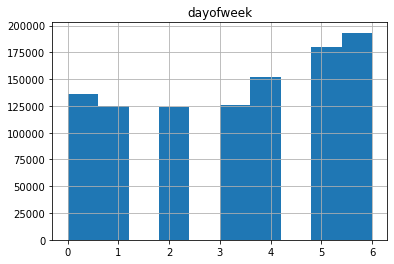

In [20]:
WFD.hist(column = ['dayofweek'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f9762e0>]],
      dtype=object)

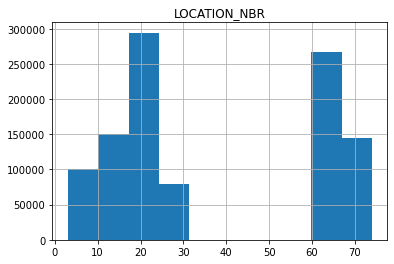

In [21]:
WFD.hist(column = ['LOCATION_NBR'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fb14d30>]],
      dtype=object)

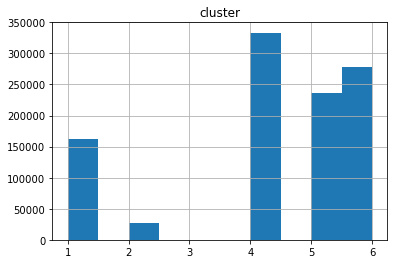

In [22]:
WFD.hist(column = ['cluster'])

### TRYING TO DETERMINE A TARGET VARIABLE

In [23]:
dept_freq = WFD.groupby(['DATE_KEY', 'DEPTNAME2']).size()

In [24]:
dept_count_cols = WFD[["DATE_KEY", "DEPTNAME2"]]

In [25]:
deptfreq=dept_count_cols.groupby(['DATE_KEY','DEPTNAME2']).size().sort_values().groupby(level=0).tail(1).reset_index()
deptfreq.sort_values(by='DATE_KEY')

,DATE_KEY,DEPTNAME2,0
683,2019-01-06,GROCERY,670
320,2019-01-07,GROCERY,410
80,2019-01-08,GROCERY,333
346,2019-01-09,GROCERY,420
3,2019-01-10,GROCERY,249
...,...,...,...
401,2020-12-27,GROCERY,439
126,2020-12-28,GROCERY,351
183,2020-12-29,GROCERY,367
564,2020-12-30,GROCERY,533


In [26]:
deptfreq = deptfreq.rename({'DEPTNAME2': 'DOM_DEPT', 0 : 'DOM_DEPT_FREQ'}, axis = 1)
deptfreq

,DATE_KEY,DOM_DEPT,DOM_DEPT_FREQ
0,2019-01-20,GROCERY,155
1,2020-11-26,GROCERY,170
2,2019-11-28,GROCERY,196
3,2019-01-10,GROCERY,249
4,2019-03-27,GROCERY,280
...,...,...,...
719,2019-12-23,GROCERY,855
720,2020-03-13,GROCERY,916
721,2020-03-14,GROCERY,995
722,2020-03-12,GROCERY,1059


In [27]:
WFD = WFD.merge(deptfreq, how = 'left', on = 'DATE_KEY')
WFD

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,...,DEPTNAME2,WEGMANS_ORGANIC,WEGMANS_FAMPACK,IS_BULK,quarter,weekno,dayofweek,year,DOM_DEPT,DOM_DEPT_FREQ
0,6.980000e+18,2020-09-13,10,27746,1,0.0,5.039062,5.04,66,0,...,OF SUBMARINE SHOP,0,0,0,3,37,6,2020,GROCERY,599
1,-6.860000e+18,2020-06-28,10,47754,0,0.0,0.000000,-,66,0,...,COMMUNITY RELATIONS ITEMS,0,0,0,2,26,6,2020,GROCERY,523
2,-6.860000e+18,2020-06-28,10,45978,1,0.0,0.000000,-,66,0,...,OF SUBMARINE SHOP,0,0,0,2,26,6,2020,GROCERY,523
3,-6.860000e+18,2020-06-28,10,49316,2,0.0,10.796875,5.4,66,0,...,OF SUBMARINE SHOP,0,0,0,2,26,6,2020,GROCERY,523
4,-6.860000e+18,2020-06-28,10,27746,1,0.0,4.679688,4.68,66,0,...,OF SUBMARINE SHOP,0,0,0,2,26,6,2020,GROCERY,523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037401,-5.190000e+18,2019-11-26,7037,128594,1,0.0,6.109375,6.11,25,0,...,PRODUCE,0,0,0,4,48,1,2019,GROCERY,655
1037402,-4.760000e+17,2019-10-30,7037,33896,1,0.0,3.949219,3.95,25,0,...,PRODUCE,0,1,0,4,44,2,2019,GROCERY,399
1037403,-5.550000e+18,2019-07-22,7037,89326,1,0.0,2.880859,2.88,25,0,...,FLORAL,0,0,0,3,30,0,2019,GROCERY,441
1037404,-5.550000e+18,2019-07-22,7037,722724,0,0.0,0.000000,-,25,0,...,COMMUNITY RELATIONS ITEMS,0,0,0,3,30,0,2019,GROCERY,441


In [29]:
cat_freq = WFD.groupby(['DATE_KEY', 'DEPT_CAT']).size()

In [30]:
cat_count_cols = WFD[["DATE_KEY", "DEPT_CAT"]]

In [31]:
catfreq=cat_count_cols.groupby(['DATE_KEY','DEPT_CAT']).size().sort_values().groupby(level=0).tail(1).reset_index()
catfreq.sort_values(by='DATE_KEY')

,DATE_KEY,DEPT_CAT,0
701,2019-01-06,CULTURED DAIRY.YOGURT,79
276,2019-01-07,CULTURED DAIRY.YOGURT,42
23,2019-01-08,PRODUCE.COOKING VEGETABLES,30
128,2019-01-09,CULTURED DAIRY.YOGURT,36
2,2019-01-10,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,26
...,...,...,...
298,2020-12-27,PRODUCE.SALAD VEGETABLES,43
18,2020-12-28,PRODUCE.COOKING VEGETABLES,29
478,2020-12-29,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,52
561,2020-12-30,GROCERY.CHIPS & SNACKS,59


In [32]:
catfreq = catfreq.rename({'DEPT_CAT': 'DOM_CAT', 0 : 'DOM_CAT_FREQ'}, axis = 1)
catfreq

,DATE_KEY,DOM_CAT,DOM_CAT_FREQ
0,2019-01-20,GROCERY.CHIPS & SNACKS,21
1,2020-11-26,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,24
2,2019-01-10,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,26
3,2019-10-08,GROCERY.CHIPS & SNACKS,26
4,2020-01-01,PRODUCE.COOKING VEGETABLES,27
...,...,...,...
719,2019-07-03,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,88
720,2019-02-03,GROCERY.CHIPS & SNACKS,90
721,2020-03-14,GROCERY.CHIPS & SNACKS,92
722,2020-03-12,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,92


In [33]:
catfreq['DOM_CAT'].value_counts()

BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER DEPOSITS    368
GROCERY.CHIPS & SNACKS                                    209
CULTURED DAIRY.YOGURT                                      77
PRODUCE.COOKING VEGETABLES                                 22
PRODUCE.SALAD VEGETABLES                                   22
DAIRY.MILK                                                 12
PRODUCE.SALADS AND SALAD KITS                               8
GROCERY.CARBONATED SODA POP                                 3
PRODUCE.BERRIES                                             2
GROCERY.HOLIDAY CANDY                                       1
Name: DOM_CAT, dtype: int64

In [34]:
WFD = WFD.merge(catfreq, how = 'left', on = 'DATE_KEY')
WFD

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,...,WEGMANS_FAMPACK,IS_BULK,quarter,weekno,dayofweek,year,DOM_DEPT,DOM_DEPT_FREQ,DOM_CAT,DOM_CAT_FREQ
0,6.980000e+18,2020-09-13,10,27746,1,0.0,5.039062,5.04,66,0,...,0,0,3,37,6,2020,GROCERY,599,GROCERY.CHIPS & SNACKS,59
1,-6.860000e+18,2020-06-28,10,47754,0,0.0,0.000000,-,66,0,...,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
2,-6.860000e+18,2020-06-28,10,45978,1,0.0,0.000000,-,66,0,...,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
3,-6.860000e+18,2020-06-28,10,49316,2,0.0,10.796875,5.4,66,0,...,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
4,-6.860000e+18,2020-06-28,10,27746,1,0.0,4.679688,4.68,66,0,...,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037401,-5.190000e+18,2019-11-26,7037,128594,1,0.0,6.109375,6.11,25,0,...,0,0,4,48,1,2019,GROCERY,655,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,62
1037402,-4.760000e+17,2019-10-30,7037,33896,1,0.0,3.949219,3.95,25,0,...,1,0,4,44,2,2019,GROCERY,399,GROCERY.CHIPS & SNACKS,47
1037403,-5.550000e+18,2019-07-22,7037,89326,1,0.0,2.880859,2.88,25,0,...,0,0,3,30,0,2019,GROCERY,441,PRODUCE.SALADS AND SALAD KITS,40
1037404,-5.550000e+18,2019-07-22,7037,722724,0,0.0,0.000000,-,25,0,...,0,0,3,30,0,2019,GROCERY,441,PRODUCE.SALADS AND SALAD KITS,40


In [35]:
class_freq = WFD.groupby(['DATE_KEY', 'DEPT_CLASS']).size()

In [36]:
class_count_cols = WFD[["DATE_KEY", "DEPT_CLASS"]]

In [37]:
classfreq=class_count_cols.groupby(['DATE_KEY','DEPT_CLASS']).size().sort_values().groupby(level=0).tail(1).reset_index()
classfreq.sort_values(by='DATE_KEY')

,DATE_KEY,DEPT_CLASS,0
471,2019-01-06,CULTURED DAIRY.GREEK - STRAINED,48
241,2019-01-07,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,37
28,2019-01-08,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,25
220,2019-01-09,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,36
32,2019-01-10,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,26
...,...,...,...
184,2020-12-27,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,34
83,2020-12-28,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,29
525,2020-12-29,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,52
610,2020-12-30,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,58


In [49]:
classfreq['DOM_CLASS'].value_counts()

BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (LINKS)    711
PRODUCE.BANANAS                                           7
CULTURED DAIRY.GREEK - STRAINED                           3
DAIRY.LOWFAT & SKIM                                       1
GROCERY.HALLOWEEN CANDY                                   1
COMMUNITY RELATIONS ITEMS.PAPER BAG CHARGE                1
Name: DOM_CLASS, dtype: int64

In [38]:
classfreq = classfreq.rename({'DEPT_CLASS': 'DOM_CLASS', 0 : 'DOM_CLASS_FREQ'}, axis = 1)
classfreq

,DATE_KEY,DOM_CLASS,DOM_CLASS_FREQ
0,2019-01-20,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,14
1,2019-10-21,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,21
2,2019-02-19,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,21
3,2020-03-24,PRODUCE.BANANAS,21
4,2020-10-20,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,22
...,...,...,...
719,2020-07-03,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,86
720,2019-12-31,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,87
721,2019-01-18,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,87
722,2019-07-03,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,88


In [66]:
WFD = WFD.merge(classfreq, how = 'left', on = 'DATE_KEY')
WFD.head(5)

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,DEPT_CAT,DEPT_CLASS,CAT_CLASS,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN,cluster,DEPTNAME2,WEGMANS_ORGANIC,WEGMANS_FAMPACK,IS_BULK,quarter,weekno,dayofweek,year,DOM_DEPT,DOM_DEPT_FREQ,DOM_CAT,DOM_CAT_FREQ,DOM_CLASS_x,DOM_CLASS_FREQ_x,DOM_CLASS_y,DOM_CLASS_FREQ_y,DOM_CLASS_x,DOM_CLASS_FREQ_x,DOM_CLASS_y,DOM_CLASS_FREQ_y
0,6.980000e+18,2020-09-13,10,27746,1,0.0,5.039062,5.04,66,0,"Wegmans Old Fashioned 7"" Cold Sub 1 EA",96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1,OF SUBMARINE SHOP,0,0,0,3,37,6,2020,GROCERY,599,GROCERY.CHIPS & SNACKS,59,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53
1,-6.860000e+18,2020-06-28,10,47754,0,0.0,0.000000,-,66,0,Weg2Go Digital Tips 1 EA,73-05-05,COMMUNITY RELATIONS ITEMS,PERSONAL SHOPPING FEES,WEG2GO DIGITAL TIPS,COMMUNITY RELATIONS ITEMS.PERSONAL SHOPPING FEES,COMMUNITY RELATIONS ITEMS.WEG2GO DIGITAL TIPS,PERSONAL SHOPPING FEES.WEG2GO DIGITAL TIPS,0,0,0,10,62,125000.0,2,1,COMMUNITY RELATIONS ITEMS,0,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71
2,-6.860000e+18,2020-06-28,10,45978,1,0.0,0.000000,-,66,0,Wegmans Kettle Cooked Reduced Fat Original Po...,96-58-01,OF SUBMARINE SHOP,SNACKS/GROCERY,CHIPS/SNACKS,OF SUBMARINE SHOP.SNACKS/GROCERY,OF SUBMARINE SHOP.CHIPS/SNACKS,SNACKS/GROCERY.CHIPS/SNACKS,0,0,1,10,62,125000.0,2,1,OF SUBMARINE SHOP,0,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71
3,-6.860000e+18,2020-06-28,10,49316,2,0.0,10.796875,5.4,66,0,Wegmans Medium Hot Sub (Gluten Free Roll) 1 EA,96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1,OF SUBMARINE SHOP,0,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71
4,-6.860000e+18,2020-06-28,10,27746,1,0.0,4.679688,4.68,66,0,"Wegmans Old Fashioned 7"" Cold Sub 1 EA",96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1,OF SUBMARINE SHOP,0,0,0,2,26,6,2020,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71


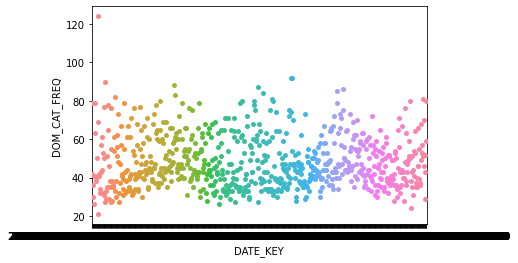

In [84]:
sns.swarmplot(x ='DATE_KEY', y ='DOM_CAT_FREQ', data = catfreq) # was playing around with seaborn. Trying to figure out how to add legend given unmarked data points

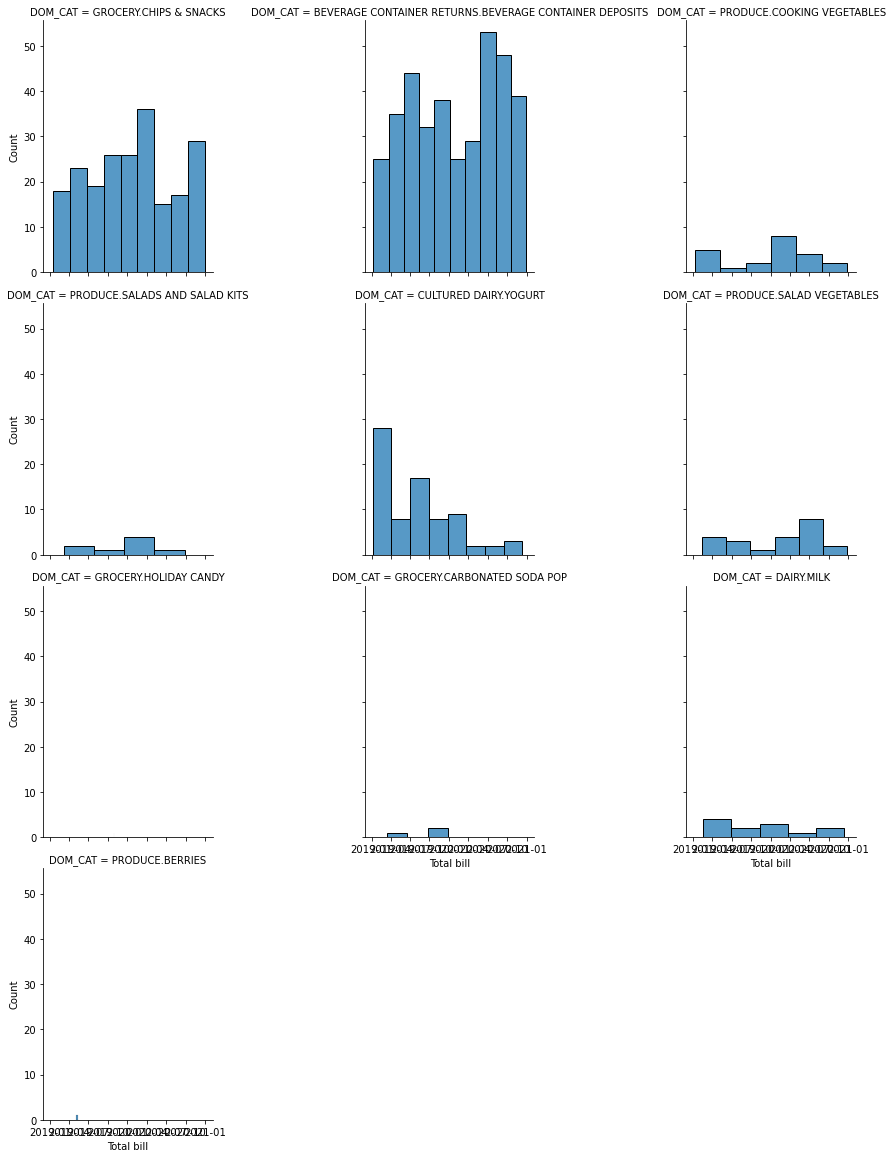

In [62]:
g = sns.FacetGrid(catfreq, col="DOM_CAT", height=4, col_wrap=3)#,  row="sex")
g.map_dataframe(sns.histplot, x="DATE_KEY")
g.set_axis_labels("Total bill", "Count")
g.fig.subplots_adjust(wspace=.9)



In [3]:
print(sns.__version__)

0.11.1


In [65]:
pd.set_option('display.max_columns', None)
age_trend=WFD.groupby(['HOH_AGE','DOM_CAT']).size().sort_values().groupby(level=0).tail(1).reset_index()
#age_trend.head(5)

In [59]:
cat_inc_dist = WFD.groupby(['DATE_KEY', 'DEPT_CLASS','HH_INCOME',"HOH_AGE"]).size()
cat_inc_cols = WFD[["DATE_KEY", "DEPT_CLASS","HH_INCOME","HOH_AGE"]]
cat_inc_dist=cat_inc_cols.groupby(["DATE_KEY", "DEPT_CLASS","HH_INCOME","HOH_AGE"]).size().sort_values().groupby(level=0).tail(1).reset_index()
cat_inc_dist.sort_values(by='DATE_KEY')

,DATE_KEY,DEPT_CLASS,HH_INCOME,HOH_AGE,0
700,2019-01-06,GROCERY.STAGE 2,75000.000000,37,6
449,2019-01-07,CULTURED DAIRY.BLENDED YOGURT,100000.000000,33,4
718,2019-01-08,GROCERY.PREMIUM CANNED CAT FOOD,50000.000000,70,8
672,2019-01-09,GROCERY.PREMIUM CANNED DOG FOOD,50000.000000,81,6
271,2019-01-10,PRODUCE.SALAD BOWLS,50000.000000,30,3
231,2019-01-11,GROCERY.CSD 2 LITER,10000.000000,30,3
650,2019-01-12,GROCERY.SPARKLING WATER 1L,40000.000000,44,5
557,2019-01-13,FROZEN FOOD.CORE POLY VEG,40000.000000,50,4
349,2019-01-14,GROCERY.PREMIUM CANNED CAT FOOD,100000.000000,76,4
334,2019-01-15,GROCERY.RDY TO EAT SOUPS,125000.000000,65,4


In [67]:
cat_inc_dist.value_counts()

DATE_KEY    DEPT_CLASS                                             HH_INCOME      HOH_AGE  0 
2019-01-06  GROCERY.STAGE 2                                        75000.000000   37       6     1
2020-04-27  CULTURED DAIRY.GREEK - STRAINED                        50000.000000   74       3     1
2020-04-29  GROCERY.PREMIUM CANNED CAT FOOD                        100000.000000  52       3     1
2020-04-30  GROCERY.BREADS & ROLLS                                 40000.000000   39       4     1
2020-05-01  FROZEN FOOD.DINNERS VALUE TIER                         125000.000000  31       5     1
2020-05-02  BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (LINKS)   50000.000000   34       4     1
2020-05-03  CULTURED DAIRY.GREEK - STRAINED                        50000.000000   49       3     1
2020-05-04  GROCERY.CHILD CEREAL                                   50000.000000   38       3     1
2020-05-05  CULTURED DAIRY.BLENDED YOGURT                          50000.000000   54       3     1
2020-05-06  CUL

In [ ]:
WFD.loc[WFD['HOH_AGE'] == 37]


### MORE EDA & FEATURE ENGINEERING

In [41]:
CustGroup = WFD.groupby('CUSTOMER_ID')['TRANSACTION_KEY'].nunique()

In [42]:
CustGroup = pd.DataFrame(CustGroup)

In [43]:
CustGroup.sort_values(by='TRANSACTION_KEY', ascending = False)[:50]

,TRANSACTION_KEY
CUSTOMER_ID,
3682,387
2419,386
3962,380
1283,373
3595,369
1224,366
55,360
1787,357
1546,354


In [44]:
dates = WFD[['DATE_KEY']]
dates.head()

,DATE_KEY
0,2020-09-13
1,2020-06-28
2,2020-06-28
3,2020-06-28
4,2020-06-28


In [45]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [46]:
cal = calendar()

In [47]:
dates['DATE_KEY'].min()

Timestamp('2019-01-06 00:00:00')

In [48]:
dates['DATE_KEY'].max()

Timestamp('2020-12-31 00:00:00')

In [49]:
holidays = cal.holidays(start=dates['DATE_KEY'].min(), end=dates['DATE_KEY'].max())
holidays

DatetimeIndex(['2019-01-21', '2019-02-18', '2019-05-27', '2019-07-04',
               '2019-09-02', '2019-10-14', '2019-11-11', '2019-11-28',
               '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-05-25', '2020-07-03', '2020-09-07', '2020-10-12',
               '2020-11-11', '2020-11-26', '2020-12-25'],
              dtype='datetime64[ns]', freq=None)

In [50]:
holidays = pd.DataFrame(holidays)

In [51]:
holidays.columns = ['DATE_KEY']

In [52]:
holidays['holiday'] = 'TRUE'

In [53]:
holidays

,DATE_KEY,holiday
0,2019-01-21,TRUE
1,2019-02-18,TRUE
2,2019-05-27,TRUE
3,2019-07-04,TRUE
4,2019-09-02,TRUE
5,2019-10-14,TRUE
6,2019-11-11,TRUE
7,2019-11-28,TRUE
8,2019-12-25,TRUE
9,2020-01-01,TRUE


In [54]:
dates = dates.merge(holidays, how = 'left', on = 'DATE_KEY')

In [55]:
dates['holiday'].fillna('FALSE', inplace = True)

In [56]:
dates[(dates['holiday'] == 'TRUE')]

,DATE_KEY,holiday
46,2020-10-12,TRUE
173,2019-11-28,TRUE
174,2019-11-28,TRUE
249,2019-09-02,TRUE
282,2019-07-04,TRUE
...,...,...
1037312,2019-01-21,TRUE
1037313,2019-01-21,TRUE
1037314,2019-01-21,TRUE
1037315,2019-01-21,TRUE


In [291]:
dates.head()

,DATE_KEY,holiday
0,2020-09-13,FALSE
1,2020-06-28,FALSE
2,2020-06-28,FALSE
3,2020-06-28,FALSE
4,2020-06-28,FALSE


In [293]:
WFD = WFD.merge(dates, how = 'left', on = 'DATE_KEY')

MemoryError: 

In [57]:
keyCOVIDdates = ['2020-01-17','2020-02-29','2020-03-01','2020-03-07','2020-03-14','2020-03-16',
                 '2020-03-20','2020-04-15','2020-05-15','2020-05-27','2020-06-02','2020-06-11',
                 '2020-06-26','2020-07-07','2020-07-16','2020-08-17','2020-10-05']

In [58]:
len(keyCOVIDdates)

17

In [59]:
keyCOVIDdescriptions = ['First coronavirus in the USA','Coronavirus test approved by FDA','First coronavirus case in NYS',
                       'NYS State of Emergency declared','First coronavirus-related death in NYS','Schools closed statewide',
                       'NYS on PAUSE','NYS residents to wear face masks in public','Phase 1 reopening - Monroe County',
                       'U.S. COVID-19 deaths pass 100,000','Phase 2 reopening - Monroe County','Phase 3 reopening - Monroe County',
                       'Phase 4 reopening - Monroe County', 'NYS schools can open to in-person instruction','Alcohol can only be served  to people ordering food.',
                       'Gyms and low-risk cultural activities can resume','NYS schools with high COVID rates must close']

In [60]:
len(keyCOVIDdescriptions)

17

In [61]:
COVIDlist = pd.DataFrame({'keyCOVIDdates': keyCOVIDdates,'keyCOVIDdescriptions': keyCOVIDdescriptions})

In [62]:
COVIDlist

,keyCOVIDdates,keyCOVIDdescriptions
0,2020-01-17,First coronavirus in the USA
1,2020-02-29,Coronavirus test approved by FDA
2,2020-03-01,First coronavirus case in NYS
3,2020-03-07,NYS State of Emergency declared
4,2020-03-14,First coronavirus-related death in NYS
5,2020-03-16,Schools closed statewide
6,2020-03-20,NYS on PAUSE
7,2020-04-15,NYS residents to wear face masks in public
8,2020-05-15,Phase 1 reopening - Monroe County
9,2020-05-27,"U.S. COVID-19 deaths pass 100,000"


In [63]:
COVIDlist.dtypes

keyCOVIDdates           object
keyCOVIDdescriptions    object
dtype: object

In [64]:
COVIDlist['keyCOVIDdates'] = pd.to_datetime(COVIDlist['keyCOVIDdates'], format='%Y-%m-%d')

In [65]:
COVIDlist.dtypes

keyCOVIDdates           datetime64[ns]
keyCOVIDdescriptions            object
dtype: object

In [ ]:
WFD = WFD.merge(COVIDlist, how = 'left')
WFD

#### TIME SERIES ANALYSIS

In [301]:
##SPLIT DATA INTO TRAIN/TEST BY YEAR

train = WFD.loc[WFD['year'] == '2019'] 
test = WFD.loc[WFD['year'] == '2020'] 

In [ ]:
#Introduce lags
lags = [1,2,3,6,12,24,36]
for lag in lags:
    WFD['sold_lag_'+str(lag)] = WFD.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sold'].shift(lag).astype(np.float16)

In [ ]:
##Mean Encoding
WFD['item_sold_avg'] = WFD.groupby('item_id')['sold'].transform('mean').astype(np.float16)
WFD['state_sold_avg'] = WFD.groupby('state_id')['sold'].transform('mean').astype(np.float16)
WFD['store_sold_avg'] = WFD.groupby('store_id')['sold'].transform('mean').astype(np.float16)
WFD['cat_sold_avg'] = WFD.groupby('cat_id')['sold'].transform('mean').astype(np.float16)
WFD['dept_sold_avg'] = WFD.groupby('dept_id')['sold'].transform('mean').astype(np.float16)
WFD['cat_dept_sold_avg'] = WFD.groupby(['cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)
WFD['store_item_sold_avg'] = WFD.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
WFD['cat_item_sold_avg'] = WFD.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
WFD['dept_item_sold_avg'] = WFD.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)
WFD['state_store_sold_avg'] = WFD.groupby(['state_id','store_id'])['sold'].transform('mean').astype(np.float16)
WFD['state_store_cat_sold_avg'] = WFD.groupby(['state_id','store_id','cat_id'])['sold'].transform('mean').astype(np.float16)
WFD['store_cat_dept_sold_avg'] = WFD.groupby(['store_id','cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)

#### NEURAL NETWORK